<a href="https://colab.research.google.com/github/samsoxu/Spada/blob/main/Tugas_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install yfinance

In [ ]:
import math
import yfinance as yf
import pandas_datareader as data
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%matplotlib inline

In [ ]:
#Mengunduh data yaitu data harga saham perusahan Pt.Bank Central Asia Tbk
df = yf.download("BBCA.JK", start="2018-01-01", end="2021-12-01")
df2 = yf.download("BBCA.JK", start="2021-11-30", end="2021-12-01")
df.tail()

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2021-11-24,7575.0,7575.0,7425.0,7475.0,7475.0,35181400.0
2021-11-25,7450.0,7525.0,7425.0,7425.0,7425.0,40216100.0
2021-11-26,7400.0,7450.0,7250.0,7275.0,7275.0,113288400.0
2021-11-29,7275.0,7425.0,7175.0,7400.0,7400.0,87907900.0
2021-11-30,7325.0,7425.0,7275.0,7275.0,7275.0,144923700.0


In [ ]:
is_NaN = df.isnull()
row_has_NaN = is_NaN.any(axis=1)
rows_with_NaN = df[row_has_NaN]

rows_with_NaN

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-12-09,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
df.astype(int)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2018-01-01,4380,4380,4380,4380,4122,0
2018-01-02,4380,4505,4365,4380,4122,82303500
2018-01-03,4385,4390,4265,4380,4122,68214000
2018-01-04,4380,4445,4380,4445,4183,76567000
2018-01-05,4460,4480,4435,4450,4188,65268000
...,...,...,...,...,...,...
2021-11-24,7575,7575,7425,7475,7475,35181400
2021-11-25,7450,7525,7425,7425,7425,40216100
2021-11-26,7400,7450,7250,7275,7275,113288400


In [ ]:
df.shape

(986, 6)

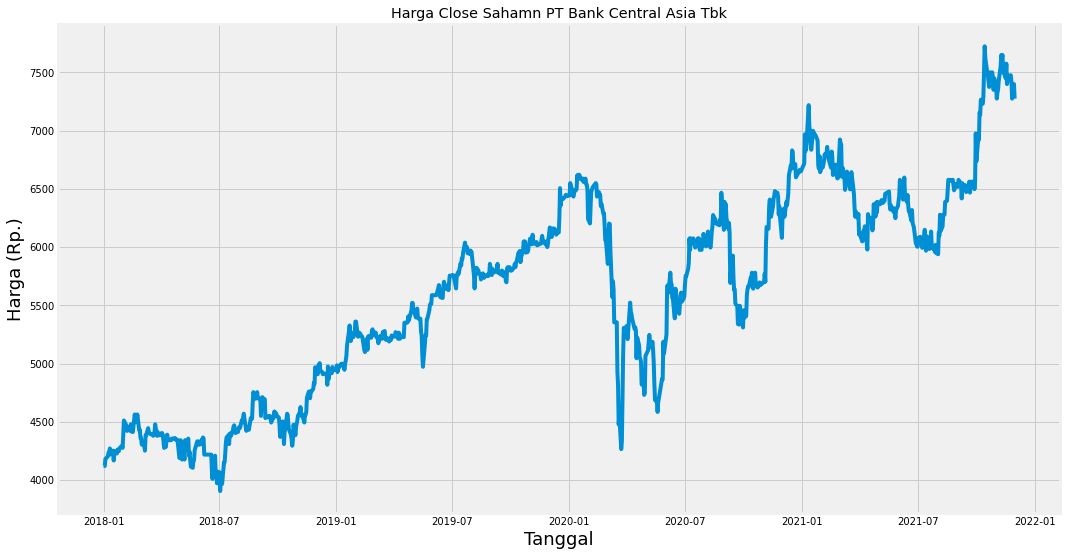

In [ ]:
#Menampilkan data harga "Close" saham BBCA
plt.figure(figsize=(16,9))
plt.title('Harga Close Sahamn PT Bank Central Asia Tbk')
plt.plot(df['Adj Close'])
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga (Rp.)', fontsize=18)
plt.show()

In [ ]:
#Mengambil data "Close" saja dari data frame sebelumnya.

data = df.filter(['Adj Close']) #menggunakan df.filter agar mendapatkan kolom Date (sebagai index) dan kolom Adj Close yang ingin dituju
dataset = data.values

In [ ]:
#Melakukan normalisasi data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [ ]:
#Melakukan split data unutk dataa Train dan data Valid (Test) dengan perbandingan Trains:Valid adalah 8:2
training_data_len = math.ceil(len(dataset) * .8)
train = data[:training_data_len]
valid = data[training_data_len:]
training_data_len

789

In [ ]:
#Memisahkan data yang telah di normalisasi dengan panjang yang telah diputuskan sebelumnya kedalam variabel train_data
train_data = scaled_data[0:training_data_len]
x_train = []
y_train = []

#Melakukan pemisahan data untuk X train dan y train sehingga dapat dimasukkan kedalam model
for i in range(60, len(train_data)):
  x_train.append(train_data[i-60:i, 0])
  y_train.append(train_data[i, 0])

In [ ]:
#Mengubah dataframe menjadi numpy array agar dapat masuk kedalam model keras
x_train, y_train = np.array(x_train), np.array(y_train)

In [ ]:
#Karena model LSTM keras membutuhkan array 3 Dimensi untuk itu melakukan reshape data.
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(729, 60, 1)

In [ ]:
#Membuat layer yang dibutuhkan dalam metode pembelajaran mesin
model = Sequential()
model.add(LSTM(50, return_sequences=True, stateful=False, go_backwards=True, input_shape = (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False, go_backwards=True, stateful=False))
model.add(Dense(25))
model.add(Dense(1))

In [ ]:
#Menambahkan 'AdamW' optimizer dan perhitungan error menggunakan "MSE"
model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
#Menjalankan model yang telah dipersiapkan sebelumnya
model.fit(x_train, y_train, batch_size=64, epochs=100)

Epoch 1/100
12/12 [==============================] - 1s 64ms/step - loss: 6.9222e-04
Epoch 2/100
12/12 [==============================] - 1s 73ms/step - loss: 6.7430e-04
Epoch 3/100
12/12 [==============================] - 1s 72ms/step - loss: 6.7265e-04
Epoch 4/100
12/12 [==============================] - 1s 73ms/step - loss: 6.9652e-04
Epoch 5/100
12/12 [==============================] - 1s 73ms/step - loss: 6.5214e-04
Epoch 6/100
12/12 [==============================] - 1s 74ms/step - loss: 6.5864e-04
Epoch 7/100
12/12 [==============================] - 1s 73ms/step - loss: 6.7417e-04
Epoch 8/100
12/12 [==============================] - 1s 73ms/step - loss: 6.8181e-04
Epoch 9/100
12/12 [==============================] - 1s 74ms/step - loss: 6.7198e-04
Epoch 10/100
12/12 [==============================] - 1s 75ms/step - loss: 7.5913e-04
Epoch 11/100
12/12 [==============================] - 1s 76ms/step - loss: 6.7683e-04
Epoch 12/100
12/12 [==============================] - 1s 74ms/s

In [ ]:
#Memasukkan data split Test data.
test_data = scaled_data[training_data_len - 60:, :]
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
  x_test.append(test_data[i-60:i, 0])

In [ ]:
#Mengubah dataframe menjadi numpy array
x_test = np.array(x_test)

In [ ]:
#Melakukan reshape data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

x_test.shape

(197, 60, 1)

In [ ]:
#Setelah model belajar lalu dilakukan predict terhadap x test
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [ ]:
#Metrics evalusi yaitu Root Means Squarred Error
rmse = np.sqrt(np.mean(predictions-y_test)**2)
rmse

55.236927942576145

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


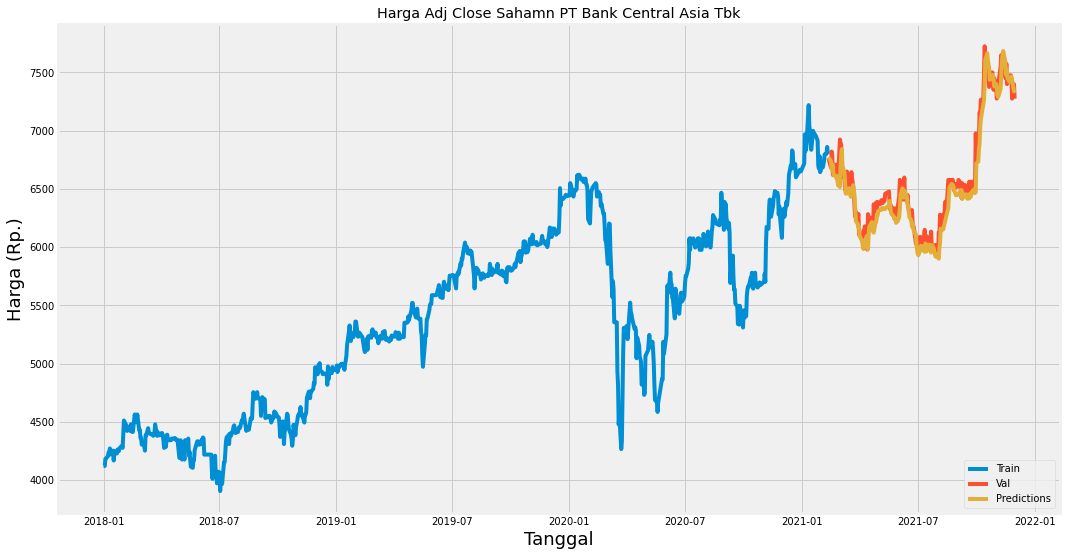

In [ ]:
#Menampilkan data asli dan data prediksi.
valid['Predictions'] = predictions

plt.figure(figsize=(16, 9))
plt.title('Harga Adj Close Sahamn PT Bank Central Asia Tbk')
plt.xlabel('Tanggal', fontsize=18)
plt.ylabel('Harga (Rp.)', fontsize=18)
plt.plot(train['Adj Close'])
plt.plot(valid[['Adj Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [ ]:
#Membuat algoritma untuk mendapatkan nilai terakhir prediksi
last_60_days = data[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)

In [ ]:
#Menampilkan hasil prediksi
print('Harga Prediksi Hari ini = ', pred_price)
print('Harga Kemarin = ', df2['Adj Close'].values)

Harga Prediksi Hari ini =  [[7286.5547]]
Harga Kemarin =  [7275.]
